###### José Javier Hurtarte #19707
###### Diana Zaray Corado #191025
# Análisis Exploratorio, PCA y Apriori

In [1]:
# Librerías a utilizar
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import numpy as np
from apyori import apriori

c:\Users\josej\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def calculate_frecuency(data, column, index='index'):
    data_f = pd.DataFrame({
        'frecuency': data[column].value_counts(),
        'relative_frecuency (%)': data[column].value_counts(normalize=True)*100,
        'relative_acc_frecuency': data[column].value_counts(normalize=True).cumsum()
    })
    data_f.reset_index(level=[0], inplace=True)
    data_f.rename(columns={index:column}, inplace=True)
    left_aligned_df = data_f.style.set_properties(**{'text-align': 'center'}) 
    display(left_aligned_df)
    return data_f

# Haga una exploración rápida de sus datos para eso haga un resumen de su dataset.


Para el análisis de los datos y puesta en práctica de los conocimientos obtenidos mediante la clases teóricas, se trabajará con un set de datos proporcionado por Kaggle denominado House Prices: Advance Regression Techniques el cual cuenta con 1460 observaciones y 80 variables, en las cuales se describen diversas características de las casas así como su precio de venta.

In [2]:
data = pd.read_csv('train.csv').drop(['Id'], axis = 1)
print(f'El formato de los datos es: {data.shape}')
data

El formato de los datos es: (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
profile = ProfileReport(data)
profile

ModuleNotFoundError: No module named 'ipywidgets'

## Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

Tal cual se puede observar en los resultados obtenidos mediante el *profiling* se cuenta con un total de 51 variables cualitativas, las cuales a continuación se separan entre cualitativas ordinales y nominales, y se cuenta con 29 variables numéricas, las cuales a su vez, se separan en continuas y discretas. A continuación se presenta una lista con las variables y lo que significan, separada por tipo de variables.

#### Cualitativas ordinales
- **LotShape:** general shape of the property
- **LandContour:** flatness of the property
- **LandSlope:** slope of the property
- **BldgType:** type of dwelling
- **OverallQual:** rates the overall material and finish of the house
- **OverallCond:** rates the overall condition of the house
- **ExterQual:** evaluates the quality of the material on the exterior
- **ExterCond:** evaluates the present condition of the material on the exterior
- **BsmtQual:** evaluates the height of the basement
- **BsmtCond:** evaluates the general conditions of the basement
- **BsmtExposure:** refers to walkout or garden level walls
- **BsmtFinType1:** rating of basement finished area
- **BsmtFinType2:** rating of basement finished area (if multiple types)
- **HeatingQC:** heating quality and condition
- **KitchenQual:** kitchen quality
- **FireplaceQu:** fireplace qualityt
- **GarageFinish:** interior finish of the garage
- **GarageQual:** garage quality
- **GarageCond:** garage condition
- **PoolQC:** pool quality
- **Fence:** fence quality

#### Cualitativas nominales
- **MSSubclass:** identifies the type of dwelling involved in the sale
- **MSZoning:** identifies the general zoning classification of hte sale
- **Street:** type of road access to property
- **Alley:** type of alley access to property
- **Utilities:** type of utilities available
- **LotConfig:** lot configuration
- **Neighborhood:** physical locations within Ames city limits
- **Condition1:** proximity to various conditions
- **Condition2:** proximity to various conditions
- **HouseStyle:** style of dwelling
- **YearBuilt:** original construction date
- **YearRemodAdd:** remodel date (same as construction if no remodeling or additions)
- **RoofStyle:** type of roof
- **RoofMatl:** roof material
- **Exterior1st:** exterior covering on house
- **Exterior2nd:** exterior covering on house
- **MasVnrType:** masonry veneer type
- **Foundation:** type of foundation
- **Heating:** type of heating
- **CentralAir:** central air conditioning
- **Electrical:** electrical system
- **Functional:** home functionality*
- **GarageType:** garage location
- **GarageYrBlt:** year garage was built
- **PavedDrive:** paved driveway*
- **MiscFeature:** miscellaneous feature not covered in other categories
- **MoSold:** month sold
- **YrSold:** year sold
- **SaleType:** type of sale
- **SaleCondition:** condition of sale

#### Cuantitativas Continuas
- **LotFrontage:** linear feet of street connected to property
- **LotArea:** lot size in square feet
- **MasVnArea:** Masonry veneer area in square feet
- **BsmtFinSF1:** type 1 finished square feet
- **BsmtFinSF2:** type 2 finished square feet
- **BsmtUnfSF:** unfinished square feet of basement area
- **TotalBsmtSF:** total square feet of basement area
- **1stFlrSF:** first Floor square feet
- **2ndFlrSF:** second floor square feet
- **LowQualFinSF:** low quality finished square feet (all floors)
- **GrLivArea:** above grade (ground) living area square fee
- **GarageArea:** size of garage in square feet
- **WoodDeckSF:** wood deck area in square feet
- **OpenPorchSF:** open porch area in square feet
- **EnclosedPorch:** enclosed porch area in square feet
- **3SsnPorch:** three season porch area in square feet
- **ScreenPorch:** screen porch area in square feet
- **PoolArea:** pool area in square feet
- **SalePrice:** price of the property

#### Cuantitativas Discretas
- **BsmtFullBath:** basement full bathrooms
- **BsmtHalfBath:** basement half bathrooms
- **FullBath:** full bathrooms above grade
- **HalfBath:** half baths above grade
- **Bedroom:** bedrooms above grade (does NOT include basement bedrooms)
- **Kitchen:** kitchens above grade
- **TotRmsAbvGrd:** total rooms above grade (does not include bathrooms)
- **Fireplaces:** number of fireplaces
- **GarageCars:** size of garage in car capacity
- **MiscVal:** value of miscellaneous feature

## Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando
Los gráficos se pueden observar en el reporte anterior obtenido mediante la librería *profiling*

## Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

In [3]:
# quantitative variables
quantitative = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'MiscVal',
    'SalePrice'
]

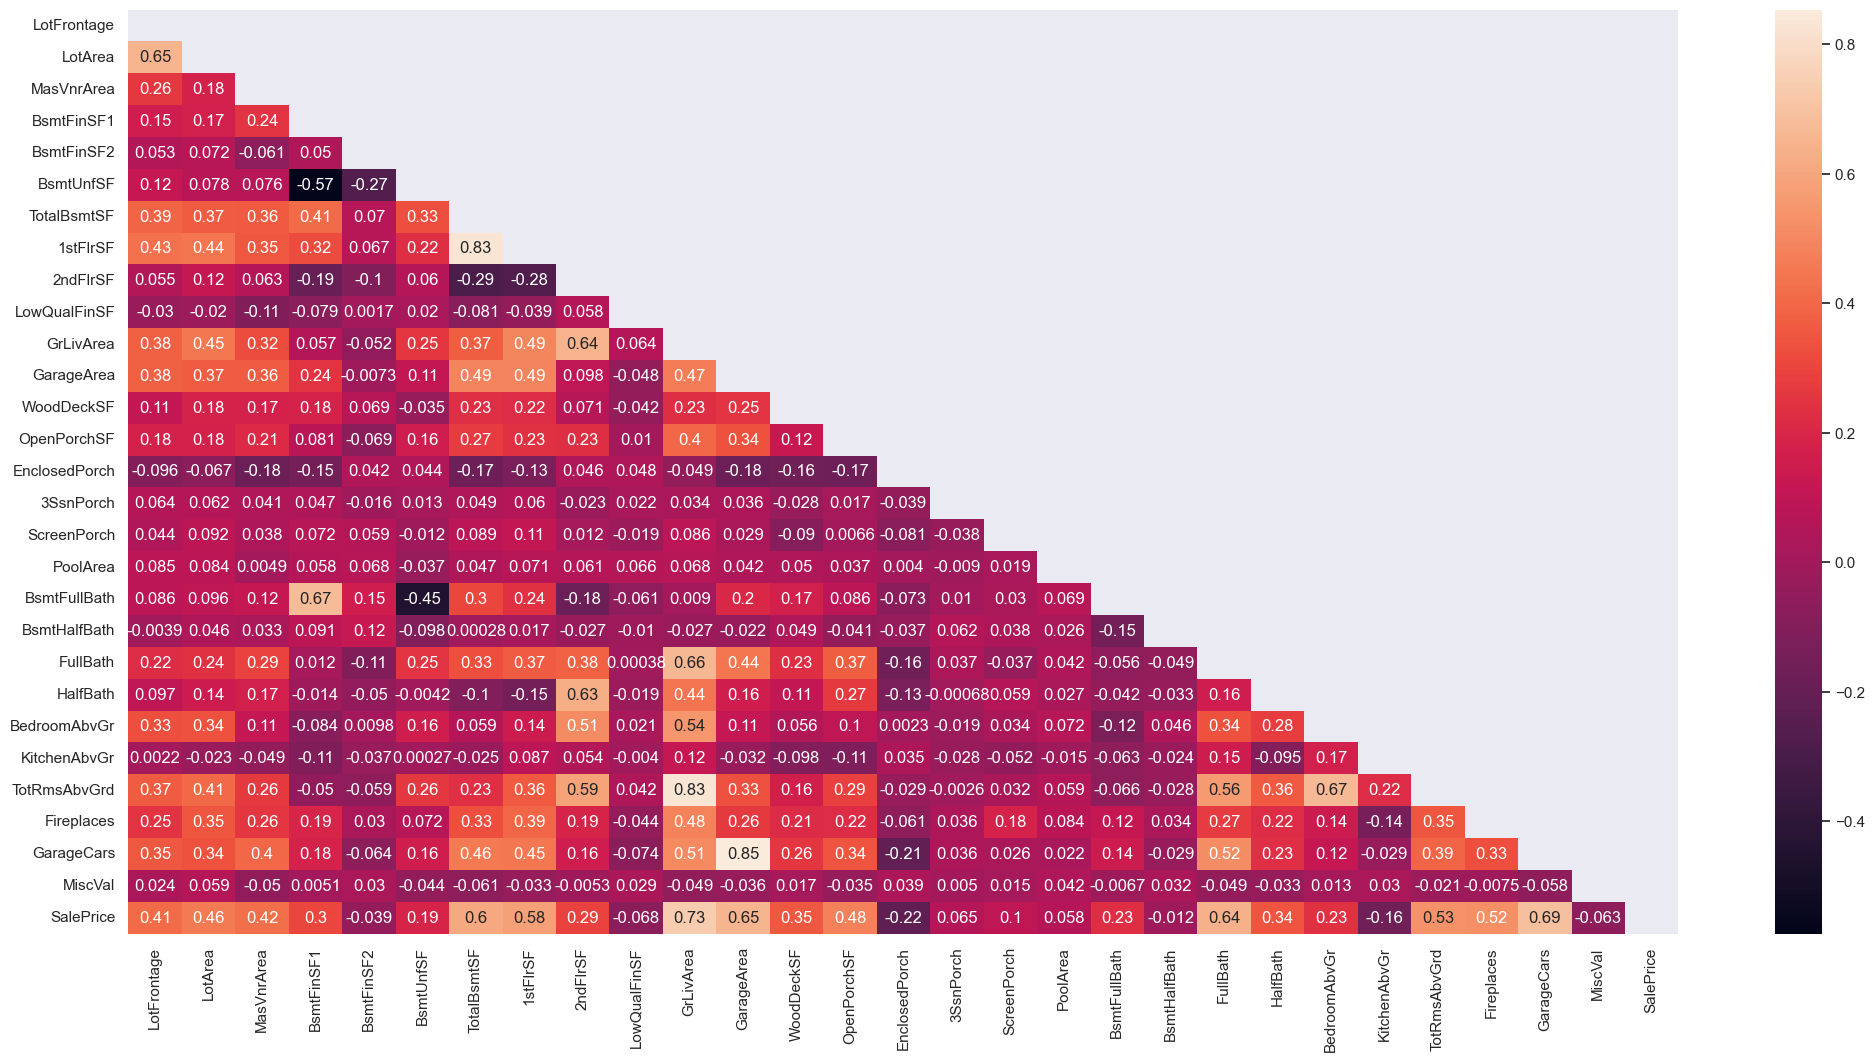

In [ ]:
quantitative_data = data[quantitative]
correlation = quantitative_data.corr(method = 'spearman')
plt.figure(figsize=(25,12))
matrix = np.triu(correlation)
sns.heatmap(correlation, annot=True, mask=matrix)
plt.show()

del correlation, matrix

Del análisis de correlación elaborado anteriormente se puede observar que 22 variables cuentan con una correlación significativa, es decir igual o por arriba de 0.5. Entre estas se tienen, el área de garage con el precio al cual se vende una casa, así como la cantidad total de cuartos con el espacio de área verde disponible.

## Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos

#### ¿Cuál es el estilo de vivienda predominante?
Es estilo de vivienda predominante o el que más se ha vendido según los datos de entrenamiento son aquellas casa de 1 piso estilo 1946 y más pisos con diferentes estilos.

In [ ]:
feature = calculate_frecuency(data, 'MSSubClass')
del feature

,MSSubClass,frecuency,relative_frecuency (%),relative_acc_frecuency
0,20,536,36.712329,0.367123
1,60,299,20.479452,0.571918
2,50,144,9.863014,0.670548
3,120,87,5.958904,0.730137
4,30,69,4.726027,0.777397
5,160,63,4.315068,0.820548
6,70,60,4.109589,0.861644
7,80,58,3.972603,0.901370
8,90,52,3.561644,0.936986
9,190,30,2.054795,0.957534


#### ¿En qué zona se encuentran las casas más vendidas?
Las zonas en las cuales se encuentran las casas más vendidas son en residenciales con baja densidad. Algo interesante es que no existen casas en zonas industriales o de agricultura.

,MSZoning,frecuency,relative_frecuency (%),relative_acc_frecuency
0,RL,1151,78.835616,0.788356
1,RM,218,14.931507,0.937671
2,FV,65,4.452055,0.982192
3,RH,16,1.095890,0.993151
4,C (all),10,0.684932,1.000000


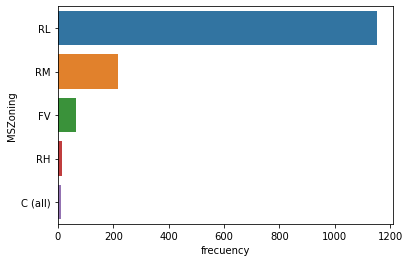

In [ ]:
zoning = calculate_frecuency(data, 'MSZoning')
sns.barplot(x='frecuency', y='MSZoning', data=zoning)
del zoning

#### ¿Son mayores las ventas si el tipo de vía de acceso a la propiedad es pavimentado?
Sí son mayores las ventas con la vía de acceso pavimentada. De hecho, el 99.5% de las casa vendidas, en los datos de entrenamiento, tienen acceso pavimentado.

In [ ]:
street = calculate_frecuency(data, 'Street')
del street

,Street,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Pave,1454,99.589041,0.995890
1,Grvl,6,0.410959,1.000000


#### ¿La mayor cantidad de casas que se venden se encuentran en excelente estado?
No, las casas que más se venden son las que se encuentran en un estado promedio, aquellas que no están ni excelente pero tampoco mal. Y estás representan un 56% de las ventas totales.

,OverallCond,frecuency,relative_frecuency (%),relative_acc_frecuency
0,5,821,56.232877,0.562329
1,6,252,17.260274,0.734932
2,7,205,14.041096,0.875342
3,8,72,4.931507,0.924658
4,4,57,3.904110,0.963699
5,3,25,1.712329,0.980822
6,9,22,1.506849,0.995890
7,2,5,0.342466,0.999315
8,1,1,0.068493,1.000000


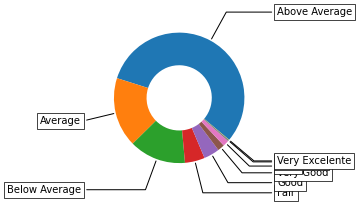

In [ ]:
overall = calculate_frecuency(data, 'OverallCond')
# giving the numbers a cualitative meaning
overall['OverallCond'] = overall['OverallCond'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Very Excelente', 'Excelente', 'Very Good', 'Good', 'Above Average', 'Average', 'Below Average', 'Fair', 'Poor', 'Very Poor']) 

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(overall['frecuency'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(overall['OverallCond'][i], xy=(x, y), xytext=(1.5*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()


#### La mayoría de viviendas cuentan con un sistema de aire acondicionado central y calefacción en buena calidad
Al menos un 96% de las viviendas cuentan con calefacción en condiciones promedio y un 93.5% cuenta con aire acondicionado central

In [ ]:
heating = calculate_frecuency(data, 'HeatingQC')
del heating

,HeatingQC,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Ex,741,50.753425,0.507534
1,TA,428,29.315068,0.800685
2,Gd,241,16.506849,0.965753
3,Fa,49,3.356164,0.999315
4,Po,1,0.068493,1.000000


In [ ]:
central = calculate_frecuency(data, 'CentralAir')
del central

,CentralAir,frecuency,relative_frecuency (%),relative_acc_frecuency
0,Y,1365,93.493151,0.934932
1,N,95,6.506849,1.000000


#### Al menos un 50% de las viviendas cuenta con garage en buenas condiciones
Un 96% de los garages de las viviendas se encuentran en condiciones promedio, y solo apenas un 0.802 tiene garage en buenas condiciones

,GarageCond,frecuency,relative_frecuency (%),relative_acc_frecuency
0,TA,1326,96.156635,0.961566
1,Fa,35,2.538071,0.986947
2,Gd,9,0.652647,0.993474
3,Po,7,0.507614,0.998550
4,Ex,2,0.145033,1.000000


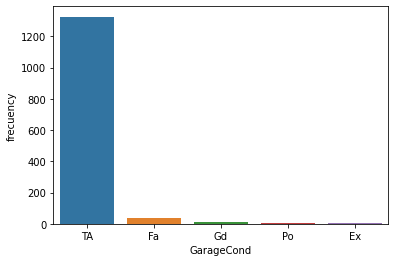

In [ ]:
garage_cond = calculate_frecuency(data, 'GarageCond')
sns.barplot(x='GarageCond', y='frecuency', data=garage_cond)
del garage_cond

#### ¿Las personas prefieren casas fundidas en concreto vertido?
Sí, al menos un 44% de las prefieren las casas de cemento vertido, sin embargo, un 43% prefieren las casas de bloques de cemento.

#### ¿Cuáles son los precios más altos por los cuales se ha vendido una casa?
De acuerdo con los resultados obtenidos se sabe que el rango de precios en el que están las casas con los precios más altos es de 755000 hasta 485000.

,Foundation,frecuency,relative_frecuency (%),relative_acc_frecuency
0,PConc,647,44.315068,0.443151
1,CBlock,634,43.424658,0.877397
2,BrkTil,146,10.000000,0.977397
3,Slab,24,1.643836,0.993836
4,Stone,6,0.410959,0.997945
5,Wood,3,0.205479,1.000000


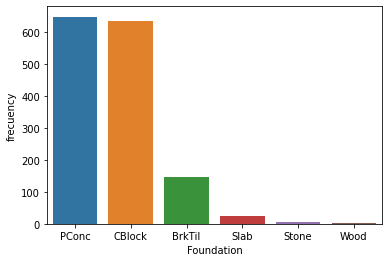

In [ ]:
foundation = calculate_frecuency(data, 'Foundation')
sns.barplot(x='Foundation', y='frecuency', data=foundation)
del foundation

In [ ]:
sale_prices  = calculate_frecuency(data, 'SalePrice')
del sale_prices

,SalePrice,frecuency,relative_frecuency (%),relative_acc_frecuency
0,140000,20,1.369863,0.013699
1,135000,17,1.164384,0.025342
2,155000,14,0.958904,0.034932
3,145000,14,0.958904,0.044521
4,190000,13,0.890411,0.053425
5,110000,13,0.890411,0.062329
6,160000,12,0.821918,0.070548
7,115000,12,0.821918,0.078767
8,130000,11,0.753425,0.086301
9,139000,11,0.753425,0.093836


# Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el índice KMO y el test de esfericidad de Bartlett. Haga un análisis de componentes principales con las variables numéricas, discuta los resultados e interprete los componentes.

In [ ]:
# Deleting null values
quantitative_data = quantitative_data.dropna()

In [ ]:
# KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
all, model = calculate_kmo(quantitative_data)
model

0.7452578732089676

La medida de suficiencia de muestreo, conocida comúnmente como KMO test, pretende explicar el nivel de correlación entre las variables, es decir, conocer cómo un *feature* es capaz de explicar a otro. El valor varía de 0 a 1, siendo 1 el ideal y generalmente se considera que los *datasets* con valores por debajo de 0.5 son inaceptados para factor de análisis.

Como se puede notar, el valor de KMO obtenido para el conjunto de datos de los precios de las casas es de **0.745** que si bien, es un valor por debajo de lo que se considera bueno, el cual es 0.80, aun así es un valor aceptable, ya que demuestra que existe correlación parcial entre las variables.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square ,p_value = calculate_bartlett_sphericity(quantitative_data)
chi_square , p_value

(96925.67307595348, 0.0)

El test de esfericidad de Barlett se basa en probar la hipótesis nula, de que la matriz de correlación de los datos es una matriz identidad. Para la validación de la hipótesis nula se utiliza un valor de significancia de 0.05, por lo tal, como se puede observar, en la prueba realizada a los datos se obtuvo un *p-value* de 0.00 rechazando así la hipótesis nula, validando que las variables sí se encuentran relacionadas.

Tanto con el KMO test como el test de esfericidad se pudo validar que los datos sí son aptos para realizar análisis de factores, ya que sí existe relación entre ellos.

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
quantitative_data = StandardScaler().fit_transform(quantitative_data)

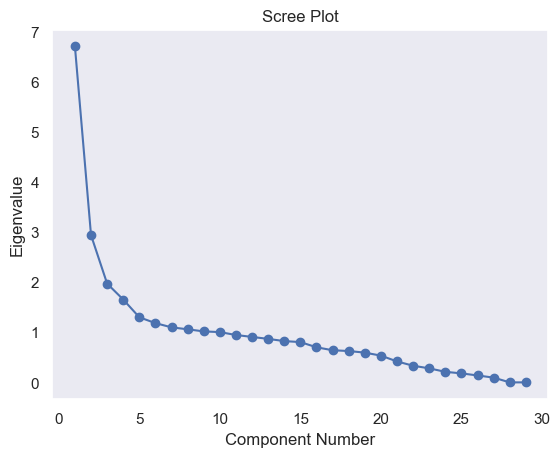

In [ ]:
# Find the more adequate number of factors
factor = FactorAnalyzer()
factor.fit(quantitative_data)
# return the eigenvalues to know how many factors are the ideal
eigenvalues, values = factor.get_eigenvalues()
# create the scree plot to see which factors explain the more variance of the data
plt.scatter(range(1,30),eigenvalues)
plt.plot(range(1,30),eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

La gráfica anterior se interpreta de manera muy similar a un gráfico de codo en el caso de *clustering*. Por lo tal, se puede observar como el número ideal de componentes en los cuales se puede simplificar el conjunto de datos es 5, esto debido a que luego de 5 componentes la variabilidad aportada a los datos no es tan significativa, es decir, el esfuerzo que se debe realizar no es compensado por la información de los nuevos componentes.

In [ ]:
factor = FactorAnalyzer(n_factors=5)
factor.fit(quantitative_data)
loadings = pd.DataFrame(data=factor.loadings_, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'], index=quantitative)
variance = pd.DataFrame(data=factor.get_factor_variance(), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
display(loadings)
display(variance)

,pc1,pc2,pc3,pc4,pc5
LotFrontage,0.571265,-0.052240,-0.002060,-0.054373,0.081792
LotArea,0.469366,-0.018071,0.072664,-0.064055,-0.005722
MasVnrArea,0.253498,0.159298,0.060540,0.304560,-0.006409
BsmtFinSF1,0.400095,-0.120785,0.757942,0.233137,0.062087
BsmtFinSF2,0.138925,-0.083554,0.115790,-0.112644,-0.053654
BsmtUnfSF,0.462826,-0.248800,-0.980579,0.041246,-0.069048
TotalBsmtSF,0.922702,-0.386867,-0.067293,0.220888,-0.016124
1stFlrSF,0.981993,-0.451102,-0.007498,0.140697,0.225033
2ndFlrSF,-0.226183,1.055046,-0.035367,-0.082888,-0.017801
LowQualFinSF,0.131109,0.036924,-0.080171,-0.252907,0.040294


,pc1,pc2,pc3,pc4,pc5
0,4.306073,3.041572,2.077597,1.966920,1.021785
1,0.148485,0.104882,0.071641,0.067825,0.035234
2,0.148485,0.253367,0.325008,0.392833,0.428067


Mediante la varianza es posible conocer el porcentaje de información que aporta cada uno de los componentes del conjunto de datos original. Como se puede observar en la tabla anterior,  el componente 1, el cual contribuye en un 15% a la varianción de los datos, en conjunto con el componente 2, el cual aporta un 11% a la variación, son los dos componentes que en conjunto aportan el mayor porcentaje de información a diferencia del resto de componentes que en conjunto solamente suman un 16%. Como se puede observar, en total se cuenta con un 43% de la información de los datos generales. Esto implica que se perdió aproximadamente un 57% de la información original, sin embargo, aún es posible utilizar una diversidad de técnicas de aprendizaje para obtener información de estos, tal como el poder conocer las características que persisten en los datos para luego poder agruparlos. 

Por otro lado, una de las estrategias que se podría utilizar para analizar si con eso es posible obtener una mayor información de los datos, es antes de realizar un análisis de componentes principales utilizar una estrategia de *feature selection* con lo cual se permitan obtener aquellas variables que son las que más delimitan el valor de la variable objetivo, y ya sobre este conjunto, ya reducido, aplicar un anáisis de componentes principales. Algo interesante que se realizó al momento de desarrollar el análisis de componentes es probar también únicamente con dos componentes principales, con los cuales, no se obtenía una porción significativa de la varianza de los datos originales. Por otro lado, en busca de poder obtener un mayor porcentaje de información se optó por utilizar 10 componentes, sin embargo, la varianza obtenida de esos últimos cinco componentes no era significativa con respecto a los primeros cinco componentes.

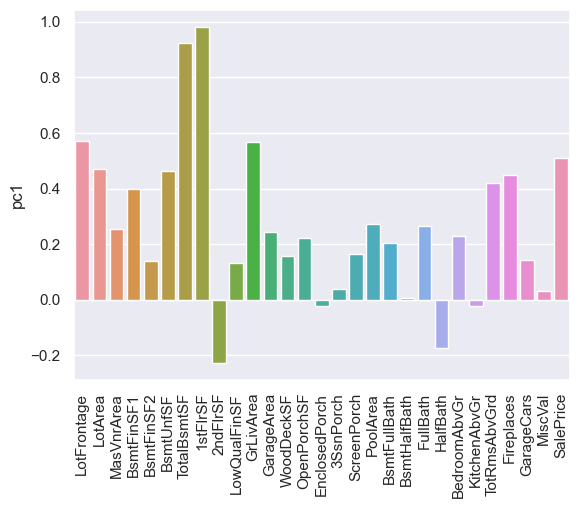

In [ ]:
# Analyzing the loadings
ax = sns.barplot(x=loadings.index, y='pc1', data=loadings)
ax.tick_params(axis='x', rotation=90)

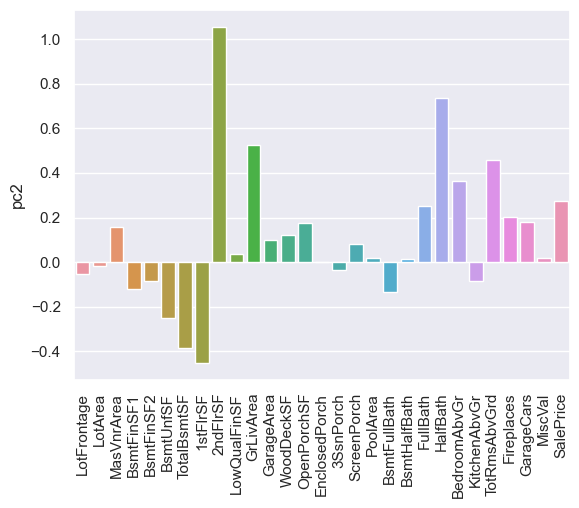

In [ ]:
ax = sns.barplot(x=loadings.index, y='pc2', data=loadings)
ax.tick_params(axis='x', rotation=90)

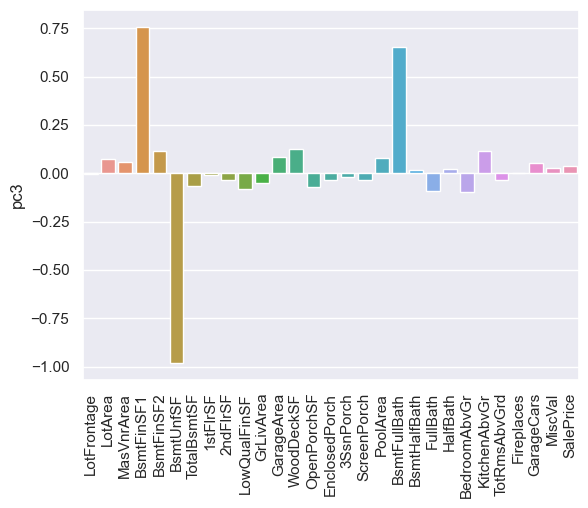

In [ ]:
ax = sns.barplot(x=loadings.index, y='pc3', data=loadings)
ax.tick_params(axis='x', rotation=90)

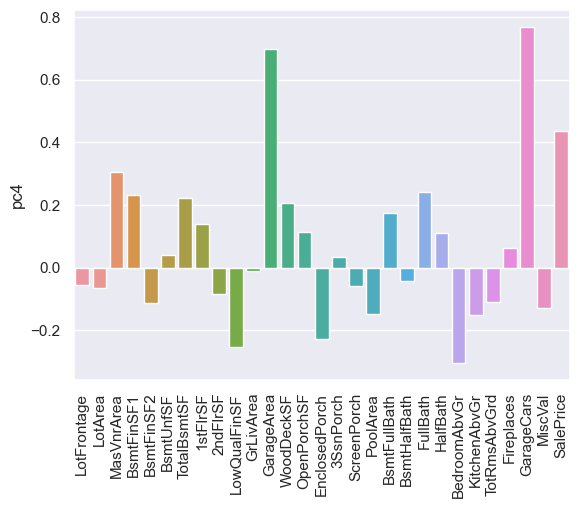

In [ ]:
ax = sns.barplot(x=loadings.index, y='pc4', data=loadings)
ax.tick_params(axis='x', rotation=90)

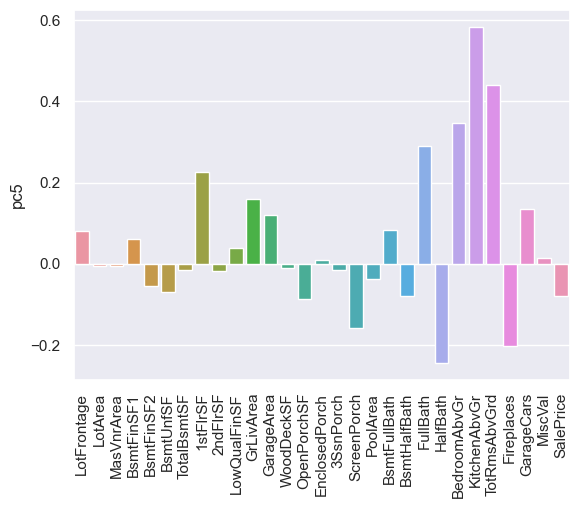

In [ ]:
ax = sns.barplot(x=loadings.index, y='pc5', data=loadings)
ax.tick_params(axis='x', rotation=90)

Si bien, mediante la varianza es posible conocer qué tanto aporta un componente a la varianza de los datos, también es necesario saber cuál es la interpretación de cada uno de los nuevos componentes, para esto se utilizan los *loadings*. Los *loadings* permiten conocer qué variables son las que más "influencian" los componentes principales. Por lo tal, en las imágenes anteriores, se graficó cada uno de los componentes, con cada uno de los valores de *loading* correspondiente para cada variable, mediante esto es posible notar que el primer componente se encuentran estrechamente influenciado por el tamaño de la propiedad en general, desde el área libre disponible, hasta el tamaño del primer piso de construcción. Por otro lado, el segundo componente se puede interpretar como el espacio disponible del segundo piso de construcción, luego se tiene el tercer componente el cual está altamente relacionado con el espacio disponible para el sótano de la propiedad, seguido se tienen el cuarto componente, con el cual es posible describir el área de garage de la casa y finalmente se tiene el quinto componente el cual permite describir el interior de la casa, desde la cantidad de cuartos disponibles hasta la cantidad de cocinas. 

# Obtenga reglas de asociación interesantes del dataset. Discuta sobre el nivel de confianza y soporte

In [57]:
#Calculo de las variables cualitativas basado en remover las cuantitativas
# cualitatives = [x for x in list(data.keys()) if x not in quantitative]

cualitatives = ['MSSubClass', 
  'MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'OverallQual',
  'OverallCond',
  'YearRemodAdd',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',#
  'MiscFeature',
  'MoSold',
  'YrSold',
  'SaleType',
  'SaleCondition']


(cualitatives, len(cualitatives))

(['MSSubClass',
  'MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'OverallQual',
  'OverallCond',
  'YearRemodAdd',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'MoSold',
  'YrSold',
  'SaleType',
  'SaleCondition'],
 50)

In [58]:
print(data[cualitatives].shape)

(1460, 50)


Podemos observar que hay 50 variables categóricas y que estas poseen, al igual que en el dataset original, 1460 datos únicos de casas

In [60]:

cualitatives_df = data[cualitatives].astype(str)


for n in cualitatives:
    cualitatives_df[n] = cualitatives_df[n].apply(lambda x: n + '-' + str(x))


In [61]:
# para transformar los datos a listas
records = []
for i in range(0, len(cualitatives_df)):
    records.append([str(cualitatives_df.values[i,j]) for j in range(0, len(cualitatives))]) 



In [62]:
#Reglas de asociación
reglas_asociacion = apriori(transactions = records, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)
output = list(reglas_asociacion)
len(output)


1144

Podemos observar que encontró 1144 reglas de asociación dentro del dataset de variables cualitativas

In [63]:
#Función para transformación del tipo de dato apryori a un dataframe, tomado del ejemplo de apriori en clase
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))


In [64]:
output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,Alley-Grvl,CentralAir-N,0.010959,0.320000,4.917895
1,Alley-Grvl,Condition1-Artery,0.007534,0.220000,6.691667
2,Exterior1st-AsbShng,Alley-Grvl,0.003425,0.250000,7.300000
3,Exterior1st-Stucco,Alley-Grvl,0.004110,0.240000,7.008000
4,Exterior2nd-Stucco,Alley-Grvl,0.004110,0.230769,6.738462
...,...,...,...,...,...
1139,YearRemodAdd-2008,SaleType-New,0.011644,0.425000,5.086066
1140,YearRemodAdd-2009,SaleType-New,0.011644,0.739130,8.845331
1141,YearRemodAdd-2010,SaleType-New,0.003425,0.833333,9.972678
1142,YearRemodAdd-2009,YrSold-2009,0.011644,0.739130,3.192694


### Datos ordenados por soporte

In [70]:

output_DataFrame.sort_values(by=['Support'], ascending=False).head(20)



,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
906,HouseStyle-2Story,MSSubClass-60,0.204110,0.669663,3.269926
403,Exterior1st-MetalSd,Exterior2nd-MetalSd,0.145205,0.963636,6.574342
386,Exterior1st-HdBoard,Exterior2nd-HdBoard,0.132192,0.869369,6.131784
441,Exterior1st-Wd Sdng,Exterior2nd-Wd Sdng,0.121233,0.859223,6.367848
892,HouseStyle-1.5Fin,MSSubClass-50,0.096575,0.915584,9.283009
1130,SaleCondition-Partial,SaleType-New,0.083562,0.976000,11.680000
410,Exterior1st-Plywood,Exterior2nd-Plywood,0.065753,0.888889,9.139280
1018,MSZoning-RM,Neighborhood-OldTown,0.065068,0.435780,5.630429
629,GarageFinish-nan,GarageYrBlt-nan,0.055479,1.000000,18.024691
609,GarageCond-nan,GarageQual-nan,0.055479,1.000000,18.024691


Basados en las reglas de asociación que presentan una mayor confianza podemos ver que en un 20% de los casos aparece la regla de casas de 2 niveles relacionadas con un MSSubClass-60, lo cual nos indica que la venta de la casa fue realizada con una casa intermediaria de 2 niveles construída a partir de 1946, esta tiene un lift de 3.26, lo cual nos dice que las ventas con una casa intermediaria de 2 niveles construída a partir de 1946 aumentan en un 326% cuando la casa vendida es de 2 niveles, lo cual se podría deber principalmente a que la casa intermediaria fue la casa que se compró. 

Algo interesante que también se encontró fue una regla de asociación que relacióna los cimientos de ladrillo y teja de una casa con el año de remodelación o construcción en 1950, además el lift de esta regla de asociación nos indica que en un 4.32 mas de veces aparecen las casas de 1950 cuando hay cimientos de ladrillo y teja. Esto se explica ya que anteriormente los cimientos solían ser construidos con estos materiales de manera rustica, en cambio hoy en día se utiliza concreto y block y debido al deterioro muchos de estos cimientos antiguos deben ser reemplazados (Burnett and Burnett, 2013). 

### Datos ordenados por confianza

In [68]:

output_DataFrame.sort_values(by=['Confidence'], ascending=False).head(20)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
1143,YearRemodAdd-2010,YrSold-2010,0.004110,1.0,8.342857
609,GarageCond-nan,GarageQual-nan,0.055479,1.0,18.024691
880,Heating-Grav,HeatingQC-Fa,0.004795,1.0,29.795918
881,Heating-Grav,YearRemodAdd-1950,0.004795,1.0,8.202247
890,YearRemodAdd-1974,HeatingQC-TA,0.004795,1.0,3.411215
905,MSSubClass-160,HouseStyle-2Story,0.043151,1.0,3.280899
610,GarageCond-nan,GarageType-nan,0.055479,1.0,18.024691
908,Neighborhood-BrDale,HouseStyle-2Story,0.010959,1.0,3.280899
608,GarageCond-nan,GarageFinish-nan,0.055479,1.0,18.024691
1017,Neighborhood-MeadowV,MSZoning-RM,0.011644,1.0,6.697248


De las cosas interesantes que nos dicen este dataset ordenado por confianza es que siempre que se  casa en 2010 se vendió la casa ese mismo año. Además algo que nos dice es que las casas que poseen calefacción gravitacional fue únicamente en remodelaciones y casas del 1950, lo cual es algo bastante explicable debido a que la calefacción gravitacional fue una tecnica antigua de calefacción utilizada desde los años 1800 pero muy populares a mediados del siglo 20 (INTERNACHI, 2022). Finalmente de manera intuitiva nos dice que si la casa no tiene condición existente de el garage será siempre que no exista garage en la casa. 

### Datos ordenados por lift

In [69]:

output_DataFrame.sort_values(by=['Lift'], ascending=False).head(20)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
773,GarageYrBlt-1984.0,YearRemodAdd-1984,0.003425,0.625000,130.357143
465,Exterior2nd-Brk Cmn,Neighborhood-NPkVill,0.003425,0.714286,115.873016
761,GarageYrBlt-1975.0,YearRemodAdd-1975,0.004795,0.777778,113.555556
719,GarageYrBlt-1953.0,YearRemodAdd-1953,0.006164,0.750000,109.500000
897,HouseStyle-1.5Unf,MSSubClass-45,0.008219,0.857143,104.285714
1128,RoofMatl-Tar&Grv,RoofStyle-Flat,0.006849,0.909091,102.097902
757,GarageYrBlt-1973.0,YearRemodAdd-1973,0.006849,0.714286,94.805195
750,GarageYrBlt-1969.0,YearRemodAdd-1969,0.008904,0.866667,90.380952
734,GarageYrBlt-1961.0,YearRemodAdd-1961,0.004110,0.461538,84.230769
723,GarageYrBlt-1956.0,YearRemodAdd-1956,0.006164,0.562500,82.125000


Con los datos ordenados por lift, podemos ver que en los años de 1984, 1975, 1953, 1973, 1969, 1961, 1956, 1967, 1979, 1963, 1964, 1980, 1957 y 1966 se logra apreciar que hay un lift mayor a 60 con la regla de asociación de año de construcción del garage y del año de remodelación de la casa, por lo que podemos decir que las remodelaciones aumentan cuando en el mismo año se construye el garage de la casa.


Además podemos observar una regla de asociación con el material del techo de grava y alquitrán y el tipo de techo plano, teniendo un lift de 102.09. por lo que podemos decir que los techos planos aumentan cuando el techo es de grava y alquitrán.

# Conclusiones

Con base en el análisis de componentes principales se puede notar que si bien no se cuenta con una alta variabilidad del conjunto de datos original, sin embargo sí es posible el obtener información relevante de las características predominantes de los grupos de datos. Mediante estas características principales es posible utilizar algoritmos de *machine learning* que permitan clasificar y agrupar los datos, como *clustering*. 

Con base a las reglas de asociación podemos decir que tan fuertemente asociadas están las variables con la confianza, así como se vio en el año de venta y de remodelación con confianza 1, que tanto aumentan las apariciones de una variable con respecto a otra con el lift, así como se vio en los techos de alquitran y grava que causaban que aumentaran los tipos de techo plano, y que tanto aparece una regla de asociación mediante el soporte, así como se vio que la regla de asociación del las casas vendidas de 2 niveles y la casa intermediaria de 2 niveles que aparecía en un 20% de los casos. 

## Referencias

Burnett, B. and Burnett, K., 2013. 100-year-old brick foundation may need to be replaced. [online] SFGATE. Available at: <https://www.sfgate.com/homeandgarden/sweatequity/article/100-year-old-brick-foundation-may-need-to-be-4958112.php>.

INTERNACHI, 2022. Gravity Furnace Inspection. [online] Nachi.org. Available at: <https://www.nachi.org/gravity-furnace-inspection.htm>.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c83f37b-21ed-4b37-836b-03683f60b89f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>